In [1]:
import pandas as pd
import numpy as np

In [2]:
# open csv file
df = pd.read_csv('all_test_psnr.csv')

In [3]:
df.head()

,Image,PSNR_Noisy,bm3d,ta_code,our_n2n,simple_cnn,zs_n2n
0,01.png,20.628003,31.233809,25.637194,28.540442,30.454386,30.223886
1,02.png,20.072332,25.996792,25.333691,26.526806,27.307503,27.512815
2,03.png,20.550628,24.633620,21.313370,25.618019,26.676823,26.561490
3,04.png,20.649671,24.049830,20.743754,24.913204,26.117413,25.758636
4,05.png,20.409546,30.131391,24.018480,28.837652,29.670670,30.009702


In [4]:

# Subtract 'bm3d' column from all other numeric columns
diff_df = df.drop(columns=['Image']).subtract(df['bm3d'], axis=0)

# If you want to keep 'Image' column in the result
diff_df.insert(0, 'Image', df['Image'])


In [ ]:
# count negative values in each column, separately for each column
neg_ta_code = (diff_df['ta_code'] < 0).sum()
neg_our_n2n = (diff_df['our_n2n'] < 0).sum()
neg_simple_cnn = (diff_df['simple_cnn'] < 0).sum()
neg_zs_n2n = (diff_df['zs_n2n'] < 0).sum()

Negative differences, i.e. number of images in which our model did worse than bm3d.

In [6]:
print(f"Negative values in ta_code: {neg_ta_code}")
print(f"Negative values in our_n2n: {neg_our_n2n}")
print(f"Negative values in simple_cnn: {neg_simple_cnn}")
print(f"Negative values in zs_n2n: {neg_zs_n2n}")

Negative values in ta_code: 50
Negative values in our_n2n: 36
Negative values in simple_cnn: 22
Negative values in zs_n2n: 21


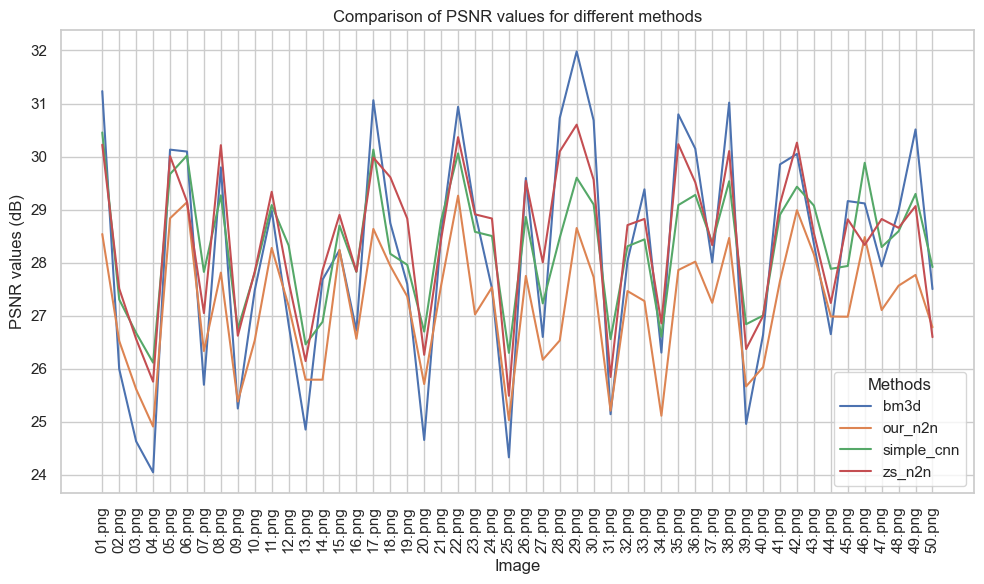

In [14]:
# plot the columns against each other
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(10, 6))
# Set the title of the plot
plt.title('Comparison of PSNR values for different methods')

# Set the x and y axis labels
plt.xlabel('Image')
plt.ylabel('PSNR values (dB)')
# Set the x-axis ticks to be the image names
plt.xticks(rotation=90)
# Set the y-axis ticks to be integers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# Plot the data
sns.lineplot(data=df, x='Image', y='bm3d', label='bm3d')
# sns.lineplot(data=df, x='Image', y='ta_code', label='ta_code')                       # SHIT MODEL
sns.lineplot(data=df, x='Image', y='our_n2n', label='our_n2n')
sns.lineplot(data=df, x='Image', y='simple_cnn', label='simple_cnn')
sns.lineplot(data=df, x='Image', y='zs_n2n', label='zs_n2n')
# Add a legend to the plot
plt.legend(title='Methods')
# Add a grid to the plot
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()

Avg. differences with bm3d

In [15]:
# find avg of each column
avg_ta_code = diff_df['ta_code'].mean()
avg_our_n2n = diff_df['our_n2n'].mean()
avg_simple_cnn = diff_df['simple_cnn'].mean()
avg_zs_n2n = diff_df['zs_n2n'].mean()

print(f"Average of ta_code: {avg_ta_code}")
print(f"Average of our_n2n: {avg_our_n2n}")
print(f"Average of simple_cnn: {avg_simple_cnn}")
print(f"Average of zs_n2n: {avg_zs_n2n}")

Average of ta_code: -3.8991598536591425
Average of our_n2n: -0.9777494510758458
Average of simple_cnn: 0.13506941915833423
Average of zs_n2n: 0.24602687404258425


- We can conclude that simple CNN and our n2n implementation are close (or even better, considering avg PSNR difference is slightly positive) to the bm3d method.